In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
fn1 = 'EPA emissions.txt'
fn2 = 'may_generator2016.xlsx'
fn3 = 'EIA923_Schedules_2_3_4_5_M_10_2016.xlsx'

# Load emissions data

In [3]:
emissions = pd.read_csv(fn1)

In [4]:
emissions.head()

,State,Facility Name,Facility ID (ORISPL),Unit ID,Associated Stacks,Month,Year,Program(s),Operating Time,Gross Load (MW-h),Steam Load (1000lb),SO2 (tons),Avg. NOx Rate (lb/MMBtu),NOx (tons),CO2 (short tons),Heat Input (MMBtu),EPA Region,NERC Region,Unit Type,Fuel Type (Primary)
AL,AMEA Sylacauga Plant,56018,1,NaN,5,2016,"CSNOX, CSNOXOS, CSSO2G2, ARP",28.00,1149.0,NaN,0.004,0.0759,0.473,732.800,12428.200,4,SERC,Combustion turbine,Pipeline Natural Gas,NaN
AL,AMEA Sylacauga Plant,56018,2,NaN,5,2016,"CSNOX, CSNOXOS, CSSO2G2, ARP",17.00,642.0,NaN,0.002,0.0809,0.283,412.300,6984.600,4,SERC,Combustion turbine,Pipeline Natural Gas,NaN
AL,Barry,3,1,CS0AAN,5,2016,"ARP, CSNOX, CSNOXOS, CSSO2G2",2.75,11.0,NaN,0.005,0.0080,0.001,14.213,240.050,4,SERC,Tangentially-fired,Pipeline Natural Gas,NaN
AL,Barry,3,2,CS0AAN,5,2016,"ARP, CSNOX, CSNOXOS, CSSO2G2",2.75,11.0,NaN,0.005,0.0080,0.001,14.213,240.050,4,SERC,Tangentially-fired,Pipeline Natural Gas,NaN
AL,Barry,3,4,NaN,5,2016,"ARP, MATS, CSNOX, CSNOXOS, CSSO2G2",725.25,116336.0,NaN,572.537,0.4319,265.224,128402.000,1251483.675,4,SERC,Tangentially-fired,Coal,NaN


From the `read_csv` docstring:

    index_col : int or sequence or False, default None
    Column to use as the row labels of the DataFrame. If a sequence is given, a
    MultiIndex is used. If you have a malformed file with delimiters at the end
    of each line, you might consider index_col=False to force pandas to _not_
    use the first column as the index (row names)

In [7]:
emissions = pd.read_csv(fn1, index_col=False)

In [8]:
emissions.head()

,State,Facility Name,Facility ID (ORISPL),Unit ID,Associated Stacks,Month,Year,Program(s),Operating Time,Gross Load (MW-h),Steam Load (1000lb),SO2 (tons),Avg. NOx Rate (lb/MMBtu),NOx (tons),CO2 (short tons),Heat Input (MMBtu),EPA Region,NERC Region,Unit Type,Fuel Type (Primary)
0,AL,AMEA Sylacauga Plant,56018,1,NaN,5,2016,"CSNOX, CSNOXOS, CSSO2G2, ARP",28.00,1149.0,NaN,0.004,0.0759,0.473,732.800,12428.200,4,SERC,Combustion turbine,Pipeline Natural Gas
1,AL,AMEA Sylacauga Plant,56018,2,NaN,5,2016,"CSNOX, CSNOXOS, CSSO2G2, ARP",17.00,642.0,NaN,0.002,0.0809,0.283,412.300,6984.600,4,SERC,Combustion turbine,Pipeline Natural Gas
2,AL,Barry,3,1,CS0AAN,5,2016,"ARP, CSNOX, CSNOXOS, CSSO2G2",2.75,11.0,NaN,0.005,0.0080,0.001,14.213,240.050,4,SERC,Tangentially-fired,Pipeline Natural Gas
3,AL,Barry,3,2,CS0AAN,5,2016,"ARP, CSNOX, CSNOXOS, CSSO2G2",2.75,11.0,NaN,0.005,0.0080,0.001,14.213,240.050,4,SERC,Tangentially-fired,Pipeline Natural Gas
4,AL,Barry,3,4,NaN,5,2016,"ARP, MATS, CSNOX, CSNOXOS, CSSO2G2",725.25,116336.0,NaN,572.537,0.4319,265.224,128402.000,1251483.675,4,SERC,Tangentially-fired,Coal


In [9]:
emissions.tail()

,State,Facility Name,Facility ID (ORISPL),Unit ID,Associated Stacks,Month,Year,Program(s),Operating Time,Gross Load (MW-h),Steam Load (1000lb),SO2 (tons),Avg. NOx Rate (lb/MMBtu),NOx (tons),CO2 (short tons),Heat Input (MMBtu),EPA Region,NERC Region,Unit Type,Fuel Type (Primary)
3919,WY,Neil Simpson II (CT2),55477,CT2,NaN,5,2016,ARP,2.16,69.00,NaN,0.000,0.0485,0.020,39.911,672.960,8,NaN,Combustion turbine,Pipeline Natural Gas
3920,WY,Wygen I,55479,001,NaN,5,2016,"ARP, MATS",662.62,58852.88,NaN,24.672,0.1298,43.135,68889.530,656851.004,8,NaN,Dry bottom wall-fired boiler,Coal
3921,WY,Wygen II,56319,001,NaN,5,2016,"ARP, MATS",744.00,69215.00,NaN,17.378,0.0534,20.303,79420.900,757259.300,8,WECC,Dry bottom wall-fired boiler,Coal
3922,WY,Wygen III,56596,001,NaN,5,2016,"ARP, MATS",581.64,62642.20,NaN,16.041,0.0481,12.642,67689.944,645401.544,8,WECC,Dry bottom wall-fired boiler,Coal
3923,WY,Wyodak,6101,BW91,NaN,5,2016,"ARP, MATS",0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,WECC,Dry bottom wall-fired boiler,Coal


## Access parts of the dataframe

In [10]:
emissions.columns

Index([u'State', u' Facility Name', u' Facility ID (ORISPL)', u' Unit ID',
       u' Associated Stacks', u' Month', u' Year', u' Program(s)',
       u' Operating Time', u' Gross Load (MW-h)', u' Steam Load (1000lb)',
       u' SO2 (tons)', u' Avg. NOx Rate (lb/MMBtu)', u' NOx (tons)',
       u' CO2 (short tons)', u' Heat Input (MMBtu)', u' EPA Region',
       u' NERC Region', u' Unit Type', u' Fuel Type (Primary)'],
      dtype='object')

In [12]:
emissions.columns = [name.strip() for name in emissions.columns]

In [13]:
emissions.columns

Index([u'State', u'Facility Name', u'Facility ID (ORISPL)', u'Unit ID',
       u'Associated Stacks', u'Month', u'Year', u'Program(s)',
       u'Operating Time', u'Gross Load (MW-h)', u'Steam Load (1000lb)',
       u'SO2 (tons)', u'Avg. NOx Rate (lb/MMBtu)', u'NOx (tons)',
       u'CO2 (short tons)', u'Heat Input (MMBtu)', u'EPA Region',
       u'NERC Region', u'Unit Type', u'Fuel Type (Primary)'],
      dtype='object')

In [14]:
emissions.dtypes

State                        object
Facility Name                object
Facility ID (ORISPL)          int64
Unit ID                      object
Associated Stacks            object
Month                         int64
Year                          int64
Program(s)                   object
Operating Time              float64
Gross Load (MW-h)           float64
Steam Load (1000lb)         float64
SO2 (tons)                  float64
Avg. NOx Rate (lb/MMBtu)    float64
NOx (tons)                  float64
CO2 (short tons)            float64
Heat Input (MMBtu)          float64
EPA Region                    int64
NERC Region                  object
Unit Type                    object
Fuel Type (Primary)          object
dtype: object

## Dataframe vs Series

In [15]:
type(emissions)

pandas.core.frame.DataFrame

In [16]:
type(emissions['State'])

pandas.core.series.Series

## Accessing parts of data

In [18]:
emissions.loc[:,'State']

0       AL
1       AL
2       AL
3       AL
4       AL
5       AL
6       AL
7       AL
8       AL
9       AL
10      AL
11      AL
12      AL
13      AL
14      AL
15      AL
16      AL
17      AL
18      AL
19      AL
20      AL
21      AL
22      AL
23      AL
24      AL
25      AL
26      AL
27      AL
28      AL
29      AL
        ..
3894    WV
3895    WV
3896    WV
3897    WV
3898    WV
3899    WY
3900    WY
3901    WY
3902    WY
3903    WY
3904    WY
3905    WY
3906    WY
3907    WY
3908    WY
3909    WY
3910    WY
3911    WY
3912    WY
3913    WY
3914    WY
3915    WY
3916    WY
3917    WY
3918    WY
3919    WY
3920    WY
3921    WY
3922    WY
3923    WY
Name: State, dtype: object

In [20]:
emissions.loc[:5,'State':'Operating Time']

,State,Facility Name,Facility ID (ORISPL),Unit ID,Associated Stacks,Month,Year,Program(s),Operating Time
0,AL,AMEA Sylacauga Plant,56018,1,NaN,5,2016,"CSNOX, CSNOXOS, CSSO2G2, ARP",28.00
1,AL,AMEA Sylacauga Plant,56018,2,NaN,5,2016,"CSNOX, CSNOXOS, CSSO2G2, ARP",17.00
2,AL,Barry,3,1,CS0AAN,5,2016,"ARP, CSNOX, CSNOXOS, CSSO2G2",2.75
3,AL,Barry,3,2,CS0AAN,5,2016,"ARP, CSNOX, CSNOXOS, CSSO2G2",2.75
4,AL,Barry,3,4,NaN,5,2016,"ARP, MATS, CSNOX, CSNOXOS, CSSO2G2",725.25
5,AL,Barry,3,5,"MS5C, MS5D, MS5E",5,2016,"ARP, MATS, CSNOX, CSNOXOS, CSSO2G2",588.00


In [21]:
emissions.iloc[:5,:3]

,State,Facility Name,Facility ID (ORISPL)
0,AL,AMEA Sylacauga Plant,56018
1,AL,AMEA Sylacauga Plant,56018
2,AL,Barry,3
3,AL,Barry,3
4,AL,Barry,3


### Sum unit emissions for each facility using `groupby`

In [24]:
emissions.groupby('Facility ID (ORISPL)')

In [27]:
facility_emiss = emissions.groupby('Facility ID (ORISPL)').sum()
facility_emiss

,Month,Year,Operating Time,Gross Load (MW-h),Steam Load (1000lb),SO2 (tons),Avg. NOx Rate (lb/MMBtu),NOx (tons),CO2 (short tons),Heat Input (MMBtu),EPA Region
Facility ID (ORISPL),,,,,,,,,,,
3,40,16128,3844.00,1048450.25,NaN,595.911,0.5760,411.165,677078.976,8471790.125,32
7,10,4032,924.00,NaN,222159.75,0.990,0.2067,13.814,15771.300,266053.425,8
8,15,6048,1837.25,505777.25,NaN,125.662,0.5375,440.348,531418.603,5179513.525,12
9,5,2016,20.60,541.68,NaN,0.003,0.2751,1.504,NaN,10441.833,6
10,55,22176,188.25,8897.75,NaN,48.579,0.8474,10.162,11340.124,144258.150,44
26,25,10080,744.00,495791.00,NaN,173.698,0.0646,165.370,524604.900,5113099.400,20
47,65,26208,20.00,177.00,NaN,0.333,4.4379,0.722,192.400,2765.600,52
50,10,4032,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
51,5,2016,553.48,262392.63,NaN,1081.656,0.2080,241.863,270128.775,2481213.560,6


### Use `apply` to apply a function to every row of the dataframe

In [31]:
def correct_region(row):
    num_units = row['Month'] / 5
    region = row['EPA Region'] / num_units
    return int(region)

In [33]:
facility_emiss.loc[:,'EPA Region'] = facility_emiss.apply(correct_region, axis=1)
facility_emiss = facility_emiss.iloc[:,2:]
facility_emiss

,Operating Time,Gross Load (MW-h),Steam Load (1000lb),SO2 (tons),Avg. NOx Rate (lb/MMBtu),NOx (tons),CO2 (short tons),Heat Input (MMBtu),EPA Region
Facility ID (ORISPL),,,,,,,,,
3,3844.00,1048450.25,NaN,595.911,0.5760,411.165,677078.976,8471790.125,4
7,924.00,NaN,222159.75,0.990,0.2067,13.814,15771.300,266053.425,4
8,1837.25,505777.25,NaN,125.662,0.5375,440.348,531418.603,5179513.525,4
9,20.60,541.68,NaN,0.003,0.2751,1.504,NaN,10441.833,6
10,188.25,8897.75,NaN,48.579,0.8474,10.162,11340.124,144258.150,4
26,744.00,495791.00,NaN,173.698,0.0646,165.370,524604.900,5113099.400,4
47,20.00,177.00,NaN,0.333,4.4379,0.722,192.400,2765.600,4
50,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
51,553.48,262392.63,NaN,1081.656,0.2080,241.863,270128.775,2481213.560,6


# Load capacity data

In [34]:
capacity = pd.read_excel(fn2, sheetname='Operating', header=1)

In [35]:
capacity.head()

,Entity ID,Entity Name,Plant ID,Plant Name,Sector,Plant State,Generator ID,Nameplate Capacity (MW),Net Summer Capacity (MW),Technology,...,Status,Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),County,Latitude,Longitude
0,195,Alabama Power Co,2.0,Bankhead Dam,Electric Utility,AL,1,53.9,56,Conventional Hydroelectric,...,(OP) Operating,,,,,,,Tuscaloosa,33.4587,-87.3568
1,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,1,153.1,55,Natural Gas Steam Turbine,...,(OP) Operating,,,,,,,Mobile,31.0069,-88.0103
2,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,2,153.1,55,Natural Gas Steam Turbine,...,(OP) Operating,,,,,,,Mobile,31.0069,-88.0103
3,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,4,403.7,362,Conventional Steam Coal,...,(OP) Operating,,,,,,,Mobile,31.0069,-88.0103
4,195,Alabama Power Co,3.0,Barry,Electric Utility,AL,5,788.8,726.5,Conventional Steam Coal,...,(OP) Operating,,,,,,,Mobile,31.0069,-88.0103


In [36]:
capacity.tail()

,Entity ID,Entity Name,Plant ID,Plant Name,Sector,Plant State,Generator ID,Nameplate Capacity (MW),Net Summer Capacity (MW),Technology,...,Status,Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),County,Latitude,Longitude
20183,60205,"Currin Solar, LLC",60403.0,"Currin Solar, LLC",IPP Non-CHP,NC,CSPV,5.2,5.2,Solar Photovoltaic,...,(OP) Operating,,,,,,,Granville,36.2896,-78.6333
20184,60163,Soltage LLC,60411.0,"Coventry Photovoltaic, LLC",IPP Non-CHP,VT,COVEN,2.2,2.2,Solar Photovoltaic,...,(OP) Operating,,,,,,,Orleans,44.9102,-72.2198
20185,60227,ORNI 37 LLC,60419.0,Don A Campbell 2 Geothermal,IPP Non-CHP,NV,DAC2G,25.0,16.2,Geothermal,...,(OP) Operating,,,,,,,Mineral,38.8358,-118.325
20186,57081,"WGL Energy Systems, Inc",60425.0,Skidmore College,IPP Non-CHP,NY,SO049,2.0,2,Solar Photovoltaic,...,(OP) Operating,,,,,,,Saratoga,43.0937,-73.8113
20187,NOTES:\nCapacity from facilities with a total ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
capacity.drop(20187, inplace=True)

In [38]:
capacity.loc[:,'Plant ID'] = capacity.loc[:,'Plant ID'].astype(int)

In [39]:
capacity.head()

,Entity ID,Entity Name,Plant ID,Plant Name,Sector,Plant State,Generator ID,Nameplate Capacity (MW),Net Summer Capacity (MW),Technology,...,Status,Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),County,Latitude,Longitude
0,195,Alabama Power Co,2,Bankhead Dam,Electric Utility,AL,1,53.9,56,Conventional Hydroelectric,...,(OP) Operating,,,,,,,Tuscaloosa,33.4587,-87.3568
1,195,Alabama Power Co,3,Barry,Electric Utility,AL,1,153.1,55,Natural Gas Steam Turbine,...,(OP) Operating,,,,,,,Mobile,31.0069,-88.0103
2,195,Alabama Power Co,3,Barry,Electric Utility,AL,2,153.1,55,Natural Gas Steam Turbine,...,(OP) Operating,,,,,,,Mobile,31.0069,-88.0103
3,195,Alabama Power Co,3,Barry,Electric Utility,AL,4,403.7,362,Conventional Steam Coal,...,(OP) Operating,,,,,,,Mobile,31.0069,-88.0103
4,195,Alabama Power Co,3,Barry,Electric Utility,AL,5,788.8,726.5,Conventional Steam Coal,...,(OP) Operating,,,,,,,Mobile,31.0069,-88.0103


### Check column names

In [40]:
capacity.columns

Index([u'Entity ID', u'Entity Name', u'Plant ID', u'Plant Name', u'Sector',
       u'Plant State', u'Generator ID', u'\nNameplate Capacity (MW)',
       u'\n \nNet Summer Capacity (MW)', u'Technology', u'Energy Source Code',
       u'Prime Mover Code', u'Operating Month', u'Operating Year',
       u'Planned Retirement Month', u'Planned Retirement Year', u'Status',
       u'Planned Derate Year', u'Planned Derate Month',
       u'Planned Derate of Summer Capacity (MW)', u'Planned Uprate Year',
       u'Planned Uprate Month', u'Planned Uprate of Summer Capacity (MW)',
       u'County', u'Latitude', u'Longitude'],
      dtype='object')

In [41]:
capacity.columns = [name.strip() for name in capacity.columns]

In [42]:
capacity.columns

Index([u'Entity ID', u'Entity Name', u'Plant ID', u'Plant Name', u'Sector',
       u'Plant State', u'Generator ID', u'Nameplate Capacity (MW)',
       u'Net Summer Capacity (MW)', u'Technology', u'Energy Source Code',
       u'Prime Mover Code', u'Operating Month', u'Operating Year',
       u'Planned Retirement Month', u'Planned Retirement Year', u'Status',
       u'Planned Derate Year', u'Planned Derate Month',
       u'Planned Derate of Summer Capacity (MW)', u'Planned Uprate Year',
       u'Planned Uprate Month', u'Planned Uprate of Summer Capacity (MW)',
       u'County', u'Latitude', u'Longitude'],
      dtype='object')

### Boolean filtering

In [43]:
PA_cap = capacity.loc[capacity['Plant State']=='PA',:]
PA_cap

,Entity ID,Entity Name,Plant ID,Plant Name,Sector,Plant State,Generator ID,Nameplate Capacity (MW),Net Summer Capacity (MW),Technology,...,Status,Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),County,Latitude,Longitude
5223,14165,NRG Power Midwest LP,3096,Brunot Island,IPP Non-CHP,PA,1A,25.5,15,Petroleum Liquids,...,(OP) Operating,,,,,,,Allegheny,40.4649,-80.0438
5224,14165,NRG Power Midwest LP,3096,Brunot Island,IPP Non-CHP,PA,2A,65.3,46,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Allegheny,40.4649,-80.0438
5225,14165,NRG Power Midwest LP,3096,Brunot Island,IPP Non-CHP,PA,2B,65.3,48,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Allegheny,40.4649,-80.0438
5226,14165,NRG Power Midwest LP,3096,Brunot Island,IPP Non-CHP,PA,3,65.3,49,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Allegheny,40.4649,-80.0438
5227,14165,NRG Power Midwest LP,3096,Brunot Island,IPP Non-CHP,PA,ST4,144.0,101,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Allegheny,40.4649,-80.0438
5228,17235,NRG REMA LLC,3109,Hamilton (PA),IPP Non-CHP,PA,1,19.6,18,Petroleum Liquids,...,(OP) Operating,,,,,,,Adams,39.9087,-76.9885
5229,17235,NRG REMA LLC,3110,Hunterstown,IPP Non-CHP,PA,1,20.0,18,Petroleum Liquids,...,(OP) Operating,,,,,,,Adams,39.8662,-77.1648
5230,17235,NRG REMA LLC,3110,Hunterstown,IPP Non-CHP,PA,2,20.0,17,Petroleum Liquids,...,(OP) Operating,,,,,,,Adams,39.8662,-77.1648
5231,17235,NRG REMA LLC,3110,Hunterstown,IPP Non-CHP,PA,3,20.0,18,Petroleum Liquids,...,(OP) Operating,,,,,,,Adams,39.8662,-77.1648
5232,17235,NRG REMA LLC,3111,Mountain,IPP Non-CHP,PA,1,27.0,18,Petroleum Liquids,...,(OP) Operating,,,,,,,Cumberland,40.1229,-77.1723


In [46]:
PA_cap.describe()

,Plant ID,Nameplate Capacity (MW),Operating Month,Operating Year
count,568.000000,568.000000,568.000000,568.000000
mean,35621.582746,81.443310,6.195423,1987.869718
std,25038.182319,203.914129,3.563807,23.276513
min,3096.000000,0.300000,1.000000,1905.000000
25%,3170.000000,1.600000,3.000000,1971.000000
50%,52149.000000,10.400000,6.000000,1995.000000
75%,56687.000000,57.600000,10.000000,2004.000000
max,60388.000000,1377.000000,12.000000,2016.000000


In [48]:
capacity.loc[(capacity['Plant State']=='PA') & 
            (capacity['Technology']=='Natural Gas Fired Combined Cycle'),:]

,Entity ID,Entity Name,Plant ID,Plant Name,Sector,Plant State,Generator ID,Nameplate Capacity (MW),Net Summer Capacity (MW),Technology,...,Status,Planned Derate Year,Planned Derate Month,Planned Derate of Summer Capacity (MW),Planned Uprate Year,Planned Uprate Month,Planned Uprate of Summer Capacity (MW),County,Latitude,Longitude
5224,14165,NRG Power Midwest LP,3096,Brunot Island,IPP Non-CHP,PA,2A,65.3,46,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Allegheny,40.4649,-80.0438
5225,14165,NRG Power Midwest LP,3096,Brunot Island,IPP Non-CHP,PA,2B,65.3,48,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Allegheny,40.4649,-80.0438
5226,14165,NRG Power Midwest LP,3096,Brunot Island,IPP Non-CHP,PA,3,65.3,49,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Allegheny,40.4649,-80.0438
5227,14165,NRG Power Midwest LP,3096,Brunot Island,IPP Non-CHP,PA,ST4,144.0,101,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Allegheny,40.4649,-80.0438
5381,19391,UGI Development Co,3176,Hunlock Power Station,IPP Non-CHP,PA,3,49.9,30.1,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Luzerne,41.2006,-76.07
5382,19391,UGI Development Co,3176,Hunlock Power Station,IPP Non-CHP,PA,5,48.0,48.7,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Luzerne,41.2006,-76.07
5383,19391,UGI Development Co,3176,Hunlock Power Station,IPP Non-CHP,PA,6,48.0,48.4,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Luzerne,41.2006,-76.07
11869,2468,Bucknell University,54333,Bucknell University,Commercial CHP,PA,G001,4.7,4.3,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Union,40.955,-76.8788
11870,2468,Bucknell University,54333,Bucknell University,Commercial CHP,PA,G502,1.2,0.5,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,Union,40.955,-76.8788
12320,56516,"Morris Energy Operations Company, LLC",54693,York Generation Company LLC,IPP Non-CHP,PA,GT#1,8.3,46.2,Natural Gas Fired Combined Cycle,...,(OP) Operating,,,,,,,York,39.9856,-76.6762


## Repeat groupby

In [50]:
cols = ['Plant ID', 'Nameplate Capacity (MW)']
facility_cap = capacity.loc[:,cols].groupby('Plant ID').sum()
facility_cap.head()

,Nameplate Capacity (MW)
Plant ID,
2,53.9
3,2569.5
4,225.0
7,138.0
8,1166.7


# Load generation data

In [51]:
generation = pd.read_excel(fn3, header=5)

In [52]:
generation.head()

,Plant Id,Combined Heat And Power Plant,Nuclear Unit Id,Plant Name,Operator Name,Operator Id,Plant State,Census Region,NERC Region,Reserved,...,Netgen September,Netgen October,Netgen November,Netgen December,Total Fuel Consumption Quantity,Electric Fuel Consumption Quantity,Total Fuel Consumption MMBtu,Elec Fuel Consumption MMBtu,Net Generation (Megawatthours),YEAR
0,3,N,NaN,Barry,Alabama Power Co,195,AL,ESC,SERC,NaN,...,251839,219263,.,.,4782719,4782719,4877614,4877614,2386339.000,2016
1,3,N,NaN,Barry,Alabama Power Co,195,AL,ESC,SERC,NaN,...,463646,401506,.,.,42413079,42413079,43208127,43208127,4486082.000,2016
2,3,N,NaN,Barry,Alabama Power Co,195,AL,ESC,SERC,NaN,...,473794,286736,.,.,1773704,1773704,37426485,37426485,3706973.300,2016
3,3,N,NaN,Barry,Alabama Power Co,195,AL,ESC,SERC,NaN,...,11246.3,14387.7,.,.,857741,857741,874585,874585,86059.704,2016
4,4,N,NaN,Walter Bouldin Dam,Alabama Power Co,195,AL,ESC,SERC,NaN,...,3380,884,.,.,0,0,4239930,4239930,454977.000,2016


In [53]:
generation.dtypes

Plant Id                                 int64
Combined Heat And\nPower Plant          object
Nuclear Unit Id                        float64
Plant Name                              object
Operator Name                           object
Operator Id                              int64
Plant State                             object
Census Region                           object
NERC Region                             object
Reserved                               float64
NAICS Code                               int64
EIA Sector Number                        int64
Sector Name                             object
Reported\nPrime Mover                   object
Reported\nFuel Type Code                object
AER\nFuel Type Code                     object
Reserved.1                             float64
Reserved.2                             float64
Physical\nUnit Label                    object
Quantity\nJanuary                       object
Quantity\nFebruary                      object
Quantity\nMar

In [54]:
generation.tail()

,Plant Id,Combined Heat And Power Plant,Nuclear Unit Id,Plant Name,Operator Name,Operator Id,Plant State,Census Region,NERC Region,Reserved,...,Netgen September,Netgen October,Netgen November,Netgen December,Total Fuel Consumption Quantity,Electric Fuel Consumption Quantity,Total Fuel Consumption MMBtu,Elec Fuel Consumption MMBtu,Net Generation (Megawatthours),YEAR
6841,99999,Y,NaN,State-Fuel Level Increment,State-Fuel Level Increment,99999,WY,MTN,NaN,NaN,...,20.03,20.073,.,.,2471,197,14391,1144,225.055,2016
6842,99999,Y,NaN,State-Fuel Level Increment,State-Fuel Level Increment,99999,WY,MTN,NaN,NaN,...,8371.86,6890.44,.,.,5750996,817170,5662749,804426,84996.866,2016
6843,99999,Y,NaN,State-Fuel Level Increment,State-Fuel Level Increment,99999,WY,MTN,NaN,NaN,...,282.565,112.177,.,.,7449697,152028,1362700,27810,3212.683,2016
6844,99999,Y,NaN,State-Fuel Level Increment,State-Fuel Level Increment,99999,WY,MTN,NaN,NaN,...,0,0,.,.,0,0,0,0,0.000,2016
6845,99999,Y,NaN,State-Fuel Level Increment,State-Fuel Level Increment,99999,WY,MTN,NaN,NaN,...,10293,7668.97,.,.,406340,92966,7110741,1626327,133198.240,2016


In [55]:
generation.replace('.', 0, inplace=True)

In [56]:
generation.dtypes

Plant Id                                 int64
Combined Heat And\nPower Plant          object
Nuclear Unit Id                        float64
Plant Name                              object
Operator Name                           object
Operator Id                              int64
Plant State                             object
Census Region                           object
NERC Region                             object
Reserved                               float64
NAICS Code                               int64
EIA Sector Number                        int64
Sector Name                             object
Reported\nPrime Mover                   object
Reported\nFuel Type Code                object
AER\nFuel Type Code                     object
Reserved.1                             float64
Reserved.2                             float64
Physical\nUnit Label                    object
Quantity\nJanuary                        int64
Quantity\nFebruary                       int64
Quantity\nMar

In [57]:
generation.columns

Index([u'Plant Id', u'Combined Heat And\nPower Plant', u'Nuclear Unit Id',
       u'Plant Name', u'Operator Name', u'Operator Id', u'Plant State',
       u'Census Region', u'NERC Region', u'Reserved', u'NAICS Code',
       u'EIA Sector Number', u'Sector Name', u'Reported\nPrime Mover',
       u'Reported\nFuel Type Code', u'AER\nFuel Type Code', u'Reserved.1',
       u'Reserved.2', u'Physical\nUnit Label', u'Quantity\nJanuary',
       u'Quantity\nFebruary', u'Quantity\nMarch', u'Quantity\nApril',
       u'Quantity\nMay', u'Quantity\nJune', u'Quantity\nJuly',
       u'Quantity\nAugust', u'Quantity\nSeptember', u'Quantity\nOctober',
       u'Quantity\nNovember', u'Quantity\nDecember', u'Elec_Quantity\nJanuary',
       u'Elec_Quantity\nFebruary', u'Elec_Quantity\nMarch',
       u'Elec_Quantity\nApril', u'Elec_Quantity\nMay', u'Elec_Quantity\nJune',
       u'Elec_Quantity\nJuly', u'Elec_Quantity\nAugust',
       u'Elec_Quantity\nSeptember', u'Elec_Quantity\nOctober',
       u'Elec_Quantity\

In [58]:
generation.columns = [name.strip().replace('\n', ' ') for name in generation.columns]
generation.columns

Index([u'Plant Id', u'Combined Heat And Power Plant', u'Nuclear Unit Id',
       u'Plant Name', u'Operator Name', u'Operator Id', u'Plant State',
       u'Census Region', u'NERC Region', u'Reserved', u'NAICS Code',
       u'EIA Sector Number', u'Sector Name', u'Reported Prime Mover',
       u'Reported Fuel Type Code', u'AER Fuel Type Code', u'Reserved.1',
       u'Reserved.2', u'Physical Unit Label', u'Quantity January',
       u'Quantity February', u'Quantity March', u'Quantity April',
       u'Quantity May', u'Quantity June', u'Quantity July', u'Quantity August',
       u'Quantity September', u'Quantity October', u'Quantity November',
       u'Quantity December', u'Elec_Quantity January',
       u'Elec_Quantity February', u'Elec_Quantity March',
       u'Elec_Quantity April', u'Elec_Quantity May', u'Elec_Quantity June',
       u'Elec_Quantity July', u'Elec_Quantity August',
       u'Elec_Quantity September', u'Elec_Quantity October',
       u'Elec_Quantity November', u'Elec_Quantity 

In [59]:
'Quantity January'.split()

['Quantity', 'January']

In [60]:
id_cols = ['Plant Id', 'NERC Region', 'AER Fuel Type Code']
monthly_cols = []

def find_col_names(cols):
    for col in cols:
        if 'January' in col:
            monthly_cols.append(col.split()[0])

find_col_names(generation.columns)
id_cols + monthly_cols

['Plant Id',
 'NERC Region',
 'AER Fuel Type Code',
 u'Quantity',
 u'Elec_Quantity',
 u'MMBtuPer_Unit',
 u'Tot_MMBtu',
 u'Elec_MMBtu',
 u'Netgen']

In [61]:
gen_may = pd.DataFrame(columns=id_cols + monthly_cols)
gen_may

,Plant Id,NERC Region,AER Fuel Type Code,Quantity,Elec_Quantity,MMBtuPer_Unit,Tot_MMBtu,Elec_MMBtu,Netgen


In [62]:
gen_may[id_cols] = generation.loc[:,id_cols]
gen_may.head()

,Plant Id,NERC Region,AER Fuel Type Code,Quantity,Elec_Quantity,MMBtuPer_Unit,Tot_MMBtu,Elec_MMBtu,Netgen
0,3,SERC,NG,NaN,NaN,NaN,NaN,NaN,NaN
1,3,SERC,NG,NaN,NaN,NaN,NaN,NaN,NaN
2,3,SERC,COL,NaN,NaN,NaN,NaN,NaN,NaN
3,3,SERC,NG,NaN,NaN,NaN,NaN,NaN,NaN
4,4,SERC,HYC,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
for col in monthly_cols:
    gen_may[col] = generation.loc[:,col + ' May']

In [64]:
gen_may.head()

,Plant Id,NERC Region,AER Fuel Type Code,Quantity,Elec_Quantity,MMBtuPer_Unit,Tot_MMBtu,Elec_MMBtu,Netgen
0,3,SERC,NG,64489,64489,1.017,65585,65585,223662.00
1,3,SERC,NG,4355654,4355654,1.017,4429700,4429700,421779.00
2,3,SERC,COL,178956,178956,21.425,3834132,3834132,376726.94
3,3,SERC,NG,63097,63097,1.017,64170,64170,6305.06
4,4,SERC,HYC,0,0,0.000,95361,95361,10233.00


## Groupby facilities

In [65]:
facility_gen = gen_may.groupby(['Plant Id', 'NERC Region']).sum()
facility_gen.head()

,,Quantity,Elec_Quantity,MMBtuPer_Unit,Tot_MMBtu,Elec_MMBtu,Netgen
Plant Id,NERC Region,,,,,,
3,SERC,4662196,4662196,24.476,8393587,8393587,1028473.000
4,SERC,0,0,0.000,95361,95361,10233.000
8,SERC,188233,188233,30.364,4588547,4588547,471836.004
10,SERC,116191,116191,2.066,120025,120025,6734.000
14,SERC,0,0,0.000,132060,132060,14171.000


In [66]:
facility_gen.reset_index('NERC Region', inplace=True)
facility_gen.head()

,NERC Region,Quantity,Elec_Quantity,MMBtuPer_Unit,Tot_MMBtu,Elec_MMBtu,Netgen
Plant Id,,,,,,,
3,SERC,4662196,4662196,24.476,8393587,8393587,1028473.000
4,SERC,0,0,0.000,95361,95361,10233.000
8,SERC,188233,188233,30.364,4588547,4588547,471836.004
10,SERC,116191,116191,2.066,120025,120025,6734.000
14,SERC,0,0,0.000,132060,132060,14171.000


# Merge data from all three sources

In [67]:
merged = facility_gen.merge(facility_cap, how='inner',
                           left_index=True, right_index=True)

In [68]:
merged.head()

,NERC Region,Quantity,Elec_Quantity,MMBtuPer_Unit,Tot_MMBtu,Elec_MMBtu,Netgen,Nameplate Capacity (MW)
3,SERC,4662196,4662196,24.476,8393587,8393587,1028473.000,2569.5
4,SERC,0,0,0.000,95361,95361,10233.000,225.0
8,SERC,188233,188233,30.364,4588547,4588547,471836.004,1166.7
10,SERC,116191,116191,2.066,120025,120025,6734.000,1288.4
14,SERC,0,0,0.000,132060,132060,14171.000,128.1


In [69]:
final = merged.merge(facility_emiss, how='outer', 
                     left_index=True, right_index=True)

In [70]:
final

,NERC Region,Quantity,Elec_Quantity,MMBtuPer_Unit,Tot_MMBtu,Elec_MMBtu,Netgen,Nameplate Capacity (MW),Operating Time,Gross Load (MW-h),Steam Load (1000lb),SO2 (tons),Avg. NOx Rate (lb/MMBtu),NOx (tons),CO2 (short tons),Heat Input (MMBtu),EPA Region
3,SERC,4662196.0,4662196.0,24.476,8393587.0,8393587.0,1028473.000,2569.5,3844.00,1048450.25,NaN,595.911,0.5760,411.165,677078.976,8471790.125,4.0
4,SERC,0.0,0.0,0.000,95361.0,95361.0,10233.000,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,924.00,NaN,222159.75,0.990,0.2067,13.814,15771.300,266053.425,4.0
8,SERC,188233.0,188233.0,30.364,4588547.0,4588547.0,471836.004,1166.7,1837.25,505777.25,NaN,125.662,0.5375,440.348,531418.603,5179513.525,4.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.60,541.68,NaN,0.003,0.2751,1.504,NaN,10441.833,6.0
10,SERC,116191.0,116191.0,2.066,120025.0,120025.0,6734.000,1288.4,188.25,8897.75,NaN,48.579,0.8474,10.162,11340.124,144258.150,4.0
14,SERC,0.0,0.0,0.000,132060.0,132060.0,14171.000,128.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,SERC,0.0,0.0,0.000,219444.0,219444.0,23548.000,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,SERC,0.0,0.0,0.000,145265.0,145265.0,15588.000,210.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,SERC,0.0,0.0,0.000,193742.0,193742.0,20790.000,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
final.to_csv('Final data.csv')

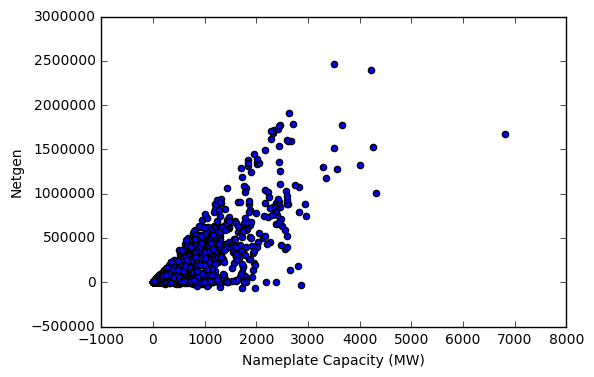

In [75]:
final.plot.scatter(x='Nameplate Capacity (MW)',
                   y='Netgen')

In [76]:
import seaborn as sns

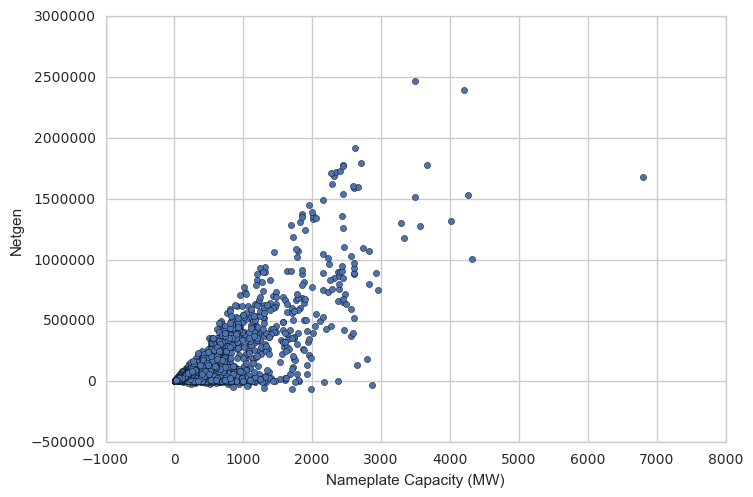

In [79]:
final.plot.scatter(x='Nameplate Capacity (MW)',
                       y='Netgen')